In [1]:
from imports import *

In [2]:
galaxy = 'ngc4254'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f657n'
instrument_f555w  = 'uvis'
instrument_f65Xn = 'uvis'
instrument_f814w = 'uvis'

# Load files
hdu_muse_f555w  = get_hdu(rootdir, 'muse/%s*_%s_*F555W.fits' %(galaxy_muse.upper(), instrument_f555w.upper()))
hdu_muse_f65Xn  = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()))
hdu_muse_f814w  = get_hdu(rootdir, 'muse/%s*_%s_*F814W.fits' %(galaxy_muse.upper(), instrument_f814w.upper()))
hdu_muse_stars  = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb    = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse        = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')

hdu_hst_f555w   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_exp_drc_sci.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_exp_drc_sci.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_exp_drc_sci.fits' %(galaxy, instrument_f814w))

hdu_hst_f555winv   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_err_drc_wht.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xninv   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_err_drc_wht.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814winv   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_err_drc_wht.fits' %(galaxy, instrument_f814w))

# Get Av for MW extinction correction
Av = get_Av(galaxy_muse)

# Get resolution 
hst_res  = 0.07 * u.arcsec
_, file_muse_f65Xn = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()), return_filename=True)
muse_res = np.float32(file_muse_f65Xn.split('asec')[0].split('-')[-1]) * u.arcsec

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.9
cr_dilation_iterations = 0

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254-0.89asec_UVIS_F555W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254-0.89asec_UVIS_F657N.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254-0.89asec_UVIS_F814W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/muse/NGC4254-0.89asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst/ngc4254_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst/ngc4254_uvis_f657n_match_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst/ngc4254_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/gal

In [3]:
do_main = True
if do_main: 
    
    # Make paths
    make_paths(rootdir)
    remove_paths(rootdir)

    hdu_muse_f555w = get_Jy_2_ergcm2sA(hdu_muse_f555w, bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'])
    hdu_muse_f65Xn = get_Jy_2_ergcm2sA(hdu_muse_f65Xn, bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'])
    hdu_muse_f814w = get_Jy_2_ergcm2sA(hdu_muse_f814w, bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

    # # Correct for MW extinction
    # hdu_muse_f555w.data = correct_extinction(hdu_muse_f555w.data, 0.275, 2.855)
    # hdu_muse_f65Xn.data = correct_extinction(hdu_muse_f65Xn.data, 0.275)
    # hdu_muse_f814w.data = correct_extinction(hdu_muse_f814w.data, 0.275, 1.536)

    # Correct for MW extinction
    hdu_muse_f555w.data = correct_extinction(hdu_muse_f555w.data, 0.275, inst=instrument_f555w.upper(), filt='F555W')
    hdu_muse_f65Xn.data = correct_extinction(hdu_muse_f65Xn.data, 0.275, inst=instrument_f65Xn.upper(), filt=narrowband_filter.upper())
    hdu_muse_f814w.data = correct_extinction(hdu_muse_f814w.data, 0.275, inst=instrument_f814w.upper(), filt='F814W')

    output_muse = get_contsub(hdu_muse_f65Xn.copy(), 
                                hdu_muse_f555w.copy(), 
                                hdu_muse_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])  
    
    hdu_muse_contsub, hdu_muse_cont = output_muse

    # Convert units
    photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']

    hdu_muse_contsub     = get_ergcm2sA_2_ergcm2s(hdu_muse_contsub, photbw)
    hdu_muse_cont        = get_ergcm2sA_2_ergcm2s(hdu_muse_cont, photbw)
    hdu_muse_f65Xn_f     = get_ergcm2sA_2_ergcm2s(hdu_muse_f65Xn, photbw)

    hdu_muse_halpha = hdu_muse['HA6562_FLUX'].copy()

    # Anchor Ha flux to MUSE
    hdu_hst_halpha_scaled, hdu_muse_halpha_scaled, fit_halpha = get_anchoring_slope(hdu_muse_halpha, hdu_muse_contsub, hdu_muse_halpha, hdu_muse_stars, '', rootdir, make_plots=True)

write_hdu(hdu_muse_cont, rootdir, '%s_muse_%s_cont.fits' %(galaxy, narrowband_filter), compress=False)
write_hdu(hdu_muse_contsub, rootdir, '%s_muse_%s_contsub.fits' %(galaxy, narrowband_filter), compress=False)
write_hdu(hdu_muse_halpha, rootdir, '%s_muse_%s_halpha.fits' %(galaxy, narrowband_filter), compress=False)
write_hdu(hdu_muse_f65Xn_f, rootdir, '%s_muse_%s_flux.fits' %(galaxy, narrowband_filter), compress=False)

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst_contsub/
Correcting data for extinction Alambda = 0.29 from Av = 0.28
Correcting data for extinction Alambda = 0.22 from Av = 0.28
Correcting data for extinction Alambda = 0.15 from Av = 0.28
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst_contsub/ngc4254_muse_f657n_cont.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst_contsub/ngc4254_muse_f657n_contsub.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst_contsub/ngc4254_muse_f657n_halpha.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc4254/hst_contsub/ngc4254_muse_f657n_flux.fits


In [4]:
fit_halpha

filter,slope_bins,intercept_lowres,intercept_highres,slopefixed_bins
str32,str32,str32,str32,str32
,1.065480669949958,246.84458383236498,246.84458383236498,1.095870132254079


In [5]:
factor = 1e5

hdu_muse_contsub.data = hdu_muse_contsub.data / factor
hdu_muse_cont.data = hdu_muse_cont.data / factor
hdu_muse_halpha.data = hdu_muse_halpha.data / factor

Text(0, 0.5, 'MUSE contsub flux (MUSE)')

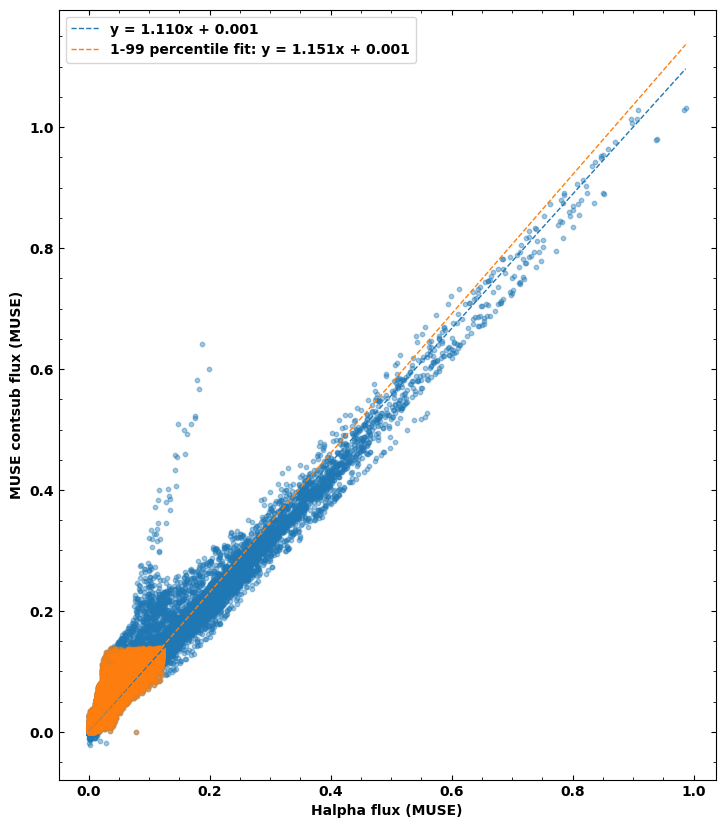

In [6]:
data_x = hdu_muse_halpha.data.flatten()
data_y = hdu_muse_contsub.data.flatten()
data_stars = hdu_muse_stars.data.flatten()

mask_x = ~np.isnan(data_x)
mask_y = ~np.isnan(data_y)
mask_star = data_stars == 0

data_x = data_x[mask_x&mask_y&mask_star]
data_y = data_y[mask_x&mask_y&mask_star]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(data_x, data_y, alpha=0.4, s=10)

fit = np.polyfit(data_x, data_y, 1)
fit_fn = np.poly1d(fit)
fit_x = np.linspace(0, max(data_x))
ax.plot(fit_x, fit_fn(fit_x), 'C0', lw=1, ls='--', label='y = %.3fx + %.3f' %(fit[0], fit[1]))
ax.legend()

# fit to only 1 to 99 percentile
percentile_1_x = np.percentile(data_x, 1)
percentile_99_x = np.percentile(data_x, 99)
percentile_1_y = np.percentile(data_y, 1)
percentile_99_y = np.percentile(data_y, 99)

mask_percentile_x = (data_x >= percentile_1_x) & (data_x <= percentile_99_x)
mask_percentile_y = (data_y >= percentile_1_y) & (data_y <= percentile_99_y)
mask_percentile = mask_percentile_x & mask_percentile_y

data_x_percentile = data_x[mask_percentile]
data_y_percentile = data_y[mask_percentile]

fit_percentile = np.polyfit(data_x_percentile, data_y_percentile, 1)
fit_fn_percentile = np.poly1d(fit_percentile)
fit_x_percentile = np.linspace(min(data_x_percentile), max(data_x_percentile))

ax.plot(fit_x, fit_fn_percentile(fit_x), 'C1', lw=1, ls='--', label='1-99 percentile fit: y = %.3fx + %.3f' %(fit_percentile[0], fit_percentile[1]))
ax.legend()
plt.scatter(data_x_percentile, data_y_percentile, alpha=0.4, s=10, c='C1')

ax.set_xlabel('Halpha flux (MUSE)')
ax.set_ylabel('MUSE contsub flux (MUSE)')

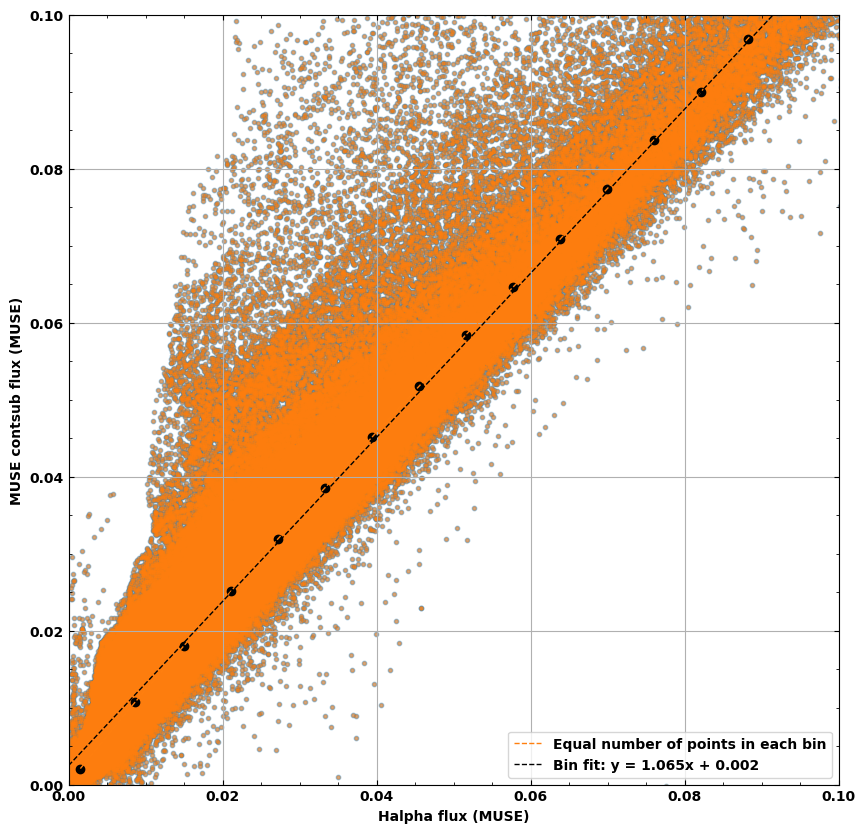

In [7]:
def get_bins(data1, data2, num_bins, min_val=None, max_val=None, equal_spaced=True):

    # Calculate min and max if not provided
    if min_val is None:
        min_val = np.nanmin(data1)
    if max_val is None:
        max_val = np.nanmax(data1)

    mask = (data1>min_val) & (data1<max_val)
    data1 = data1.copy()[mask]
    data2 = data2.copy()[mask]

    # Generate bin edges
    # for equal_spaced bins = space spacing
    if equal_spaced:
        bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    # for equal_number bins = same number of points
    else: 
        percentiles = np.linspace(0, 100, num_bins+1)
        bin_edges = np.percentile(data1, percentiles)

    # Calculate mean values within each bin
    binned_values1 = np.zeros(num_bins)
    binned_values2 = np.zeros(num_bins)

    for i in range(num_bins):

        bin_mask = ((data1>=bin_edges[i]) & (data1<=bin_edges[i+1]))
        # bin_mask = (data1>=bin_edges[i])
        bin_ids = np.where(bin_mask)

        values_in_bin1 = data1[bin_ids]
        values_in_bin2 = data2[bin_ids]

        binned_values1[i] = np.nanmedian(values_in_bin1)
        binned_values2[i] = np.nanmedian(values_in_bin2)

    return binned_values1, binned_values2

# Mask with nebmask 
data_x_masked = data_x.copy()
data_y_masked = data_y.copy()

# mask_neb = hdu_muse_neb.data.flatten()[mask_x&mask_y] == -1
# data_x_masked[mask_neb] = np.nan
# data_y_masked[mask_neb] = np.nan

# Get bins with equal number of points in each bin 
min_val, max_val = np.nanpercentile(data_x_percentile, [0, 100]) 
bin_values = get_bins(data_x_percentile, data_y_percentile, 20, equal_spaced=True, min_val=min_val, max_val=max_val)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(data_x, data_y, alpha=0.4, s=10)
ax.scatter(data_x_percentile, data_y_percentile, alpha=0.4, s=5, c='C1')

ax.scatter(bin_values[0], bin_values[1], c='k')
ax.plot(bin_values[0], bin_values[1], 'C1', lw=1, ls='--', label='Equal number of points in each bin')

fit_bin = np.polyfit(bin_values[0], bin_values[1], 1)
fit_fn_bin = np.poly1d(fit_bin)
ax.plot(fit_x, fit_fn_bin(fit_x), 'k', lw=1, ls='--', label='Bin fit: y = %.3fx + %.3f' %(fit_bin[0], fit_bin[1]))
ax.legend()

ax.set_xlim(0,0.1)
ax.set_ylim(0,0.1)

ax.set_xlabel('Halpha flux (MUSE)')
ax.set_ylabel('MUSE contsub flux (MUSE)')

ax.grid()

In [8]:
hdu1 = hdu_muse_halpha
hdu2 = hdu_muse_contsub
hdu3 = hdu_muse_stars
hdu_stars = hdu_muse_stars

data1 = hdu1.data.copy().flatten()
data2 = hdu2.data.copy().flatten()
data3 = hdu3.data.copy().flatten()

# Mask zeros 
mask_zero1 = data1==0
mask_zero2 = data2==0
data1[(mask_zero1&mask_zero2)] = np.nan
data2[(mask_zero1&mask_zero2)] = np.nan

# Mask with starmask 
mask_stars = (hdu_stars.data!=0).flatten()
data1[mask_stars] = np.nan
data2[mask_stars] = np.nan

valid_indices = np.isfinite(data1) & np.isfinite(data2)
data1 = data1[valid_indices]
data2 = data2[valid_indices]

# Mask to only lowest value points 
percentile_1_x = np.percentile(data1, 1)
percentile_99_x = np.percentile(data1, 99)
percentile_1_y = np.percentile(data2, 1)
percentile_99_y = np.percentile(data2, 99)

mask_percentile_x = (data1 >= percentile_1_x) & (data1 <= percentile_99_x)
mask_percentile_y = (data2 >= percentile_1_y) & (data2 <= percentile_99_y)
mask_percentile = mask_percentile_x & mask_percentile_y

data1 = data1[mask_percentile]
data2 = data2[mask_percentile]

# Get bins with equal number of points in each bin 
# min_val, max_val = np.percentile(data1, [10, 90]) 
# bin_values = get_bins(data1, data2, 20, equal_spaced=True, min_val=min_val, max_val=max_val)
min_val, max_val = np.nanpercentile(data1, [0, 100]) 
bin_values = get_bins(data1, data2, 20, equal_spaced=True, min_val=min_val, max_val=max_val)

# Fit binned data
model_poly = models.Polynomial1D(degree=1)
fitter_poly = fitting.LinearLSQFitter() 
best_fit_poly_bins = fitter_poly(model_poly, bin_values[0], bin_values[1])
intercept_bins, slope_bins = best_fit_poly_bins.parameters

def func_fixed(x, a):
    # For fixed offeset - y = xa + 0
    return a*x

best_fitfixed_bins, _ = curve_fit(func_fixed, bin_values[0], bin_values[1])
slopefixed_bins = best_fitfixed_bins[0]

x_fit = np.linspace(-1e3, np.nanmax(data2), 10000)
y_fit_bins = slope_bins * x_fit + intercept_bins
###

# Extract the WCS information from the input and template headers
wcs1 = wcs.WCS(hdu1.header)
wcs3 = wcs.WCS(hdu3.header)
pixscale1 = wcs.utils.proj_plane_pixel_area(wcs1.celestial)
pixscale3 = wcs.utils.proj_plane_pixel_area(wcs3.celestial)

pixscale_ratio = (pixscale3 / pixscale1)
# hdu3.data = (hdu3.data - (intercept_bins*pixscale_ratio)) / slope_bins # HST full resolution 
# hdu2.data = (hdu2.data - (intercept_bins)) / slope_bins # HST smoothed
hdu3.data = hdu3.data / slope_bins # HST full resolution 
hdu2.data = hdu2.data / slope_bins # HST smoothed
#### 

print(slope_bins)

1.0654806881073484
